In [ ]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot

(trainX,trainY), (testX,testY)= load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


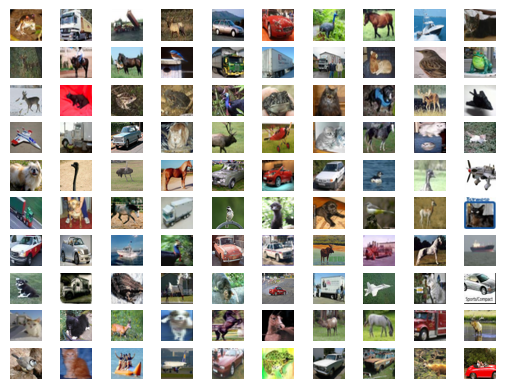

In [ ]:
for i in range(100):
  pyplot.subplot(10,10,1+i)

  pyplot.axis('off')
  pyplot.imshow(trainX[i])

pyplot.show()


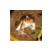

In [ ]:

pyplot.subplot(10,10,1)
pyplot.axis('off')
pyplot.imshow(trainX[0])
pyplot.show()

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import *
from keras.utils import plot_model
import numpy as np

In [ ]:
def def_discriminator(input_shape=(32,32,3)):
  model= Sequential()
  model.add(Conv2D(64, (3,3), padding='same', input_shape=input_shape))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(256,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))


  optimizer= Adam(learning_rate=0.0002, beta_1=0.5)

  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model





In [ ]:
model= def_discriminator()

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

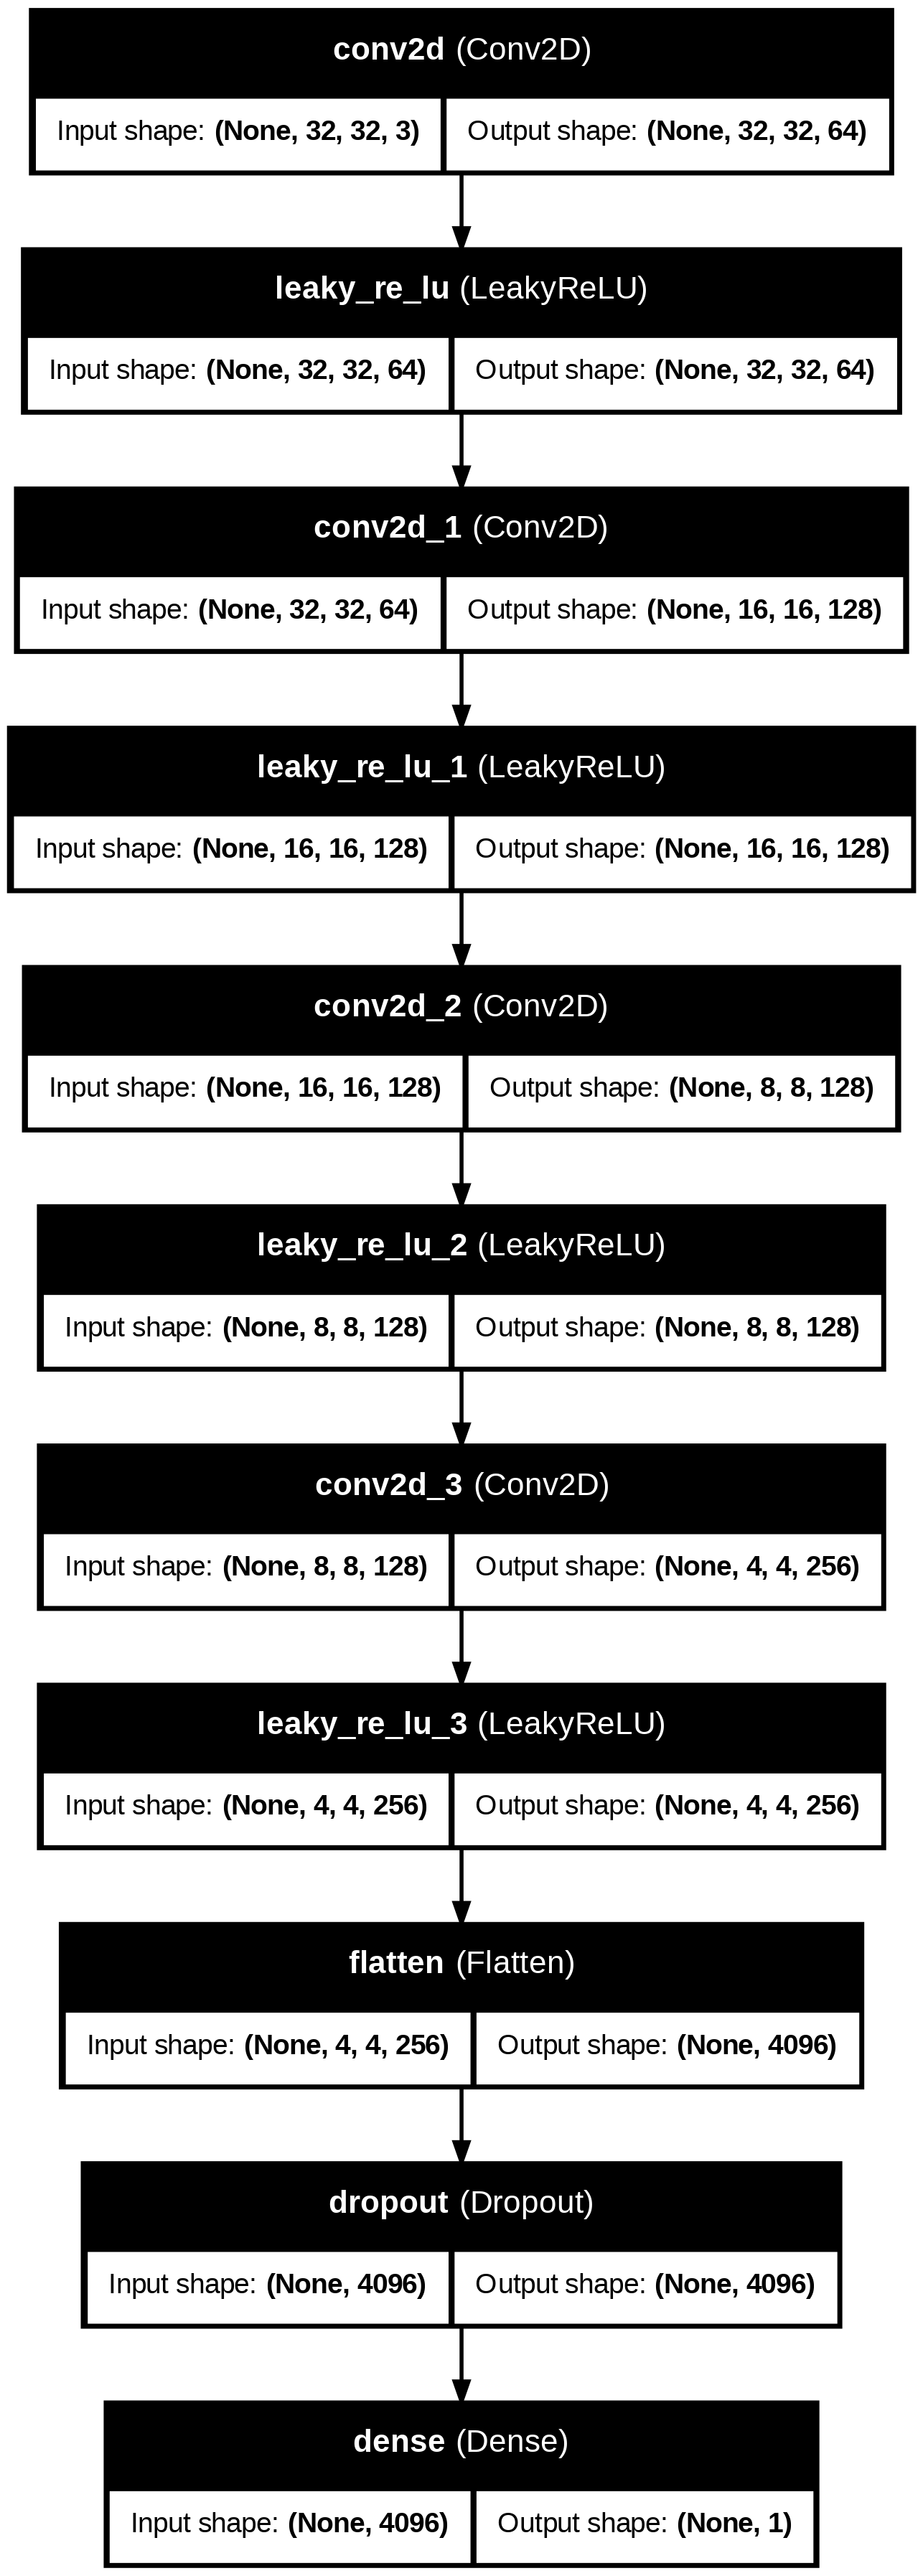

In [ ]:
plot_model(model, to_file='discriminator.png', show_shapes=True, show_layer_names=True)


In [ ]:
 def load_real_samples():
  (trainX,_),(_,_)= load_data()

  X= trainX.astype('float32')   ## to deal with compatibility issue with algorithms\
  X=(X-127.5)/127.5 ## recommended

  return X

(50000, 32, 32, 3)


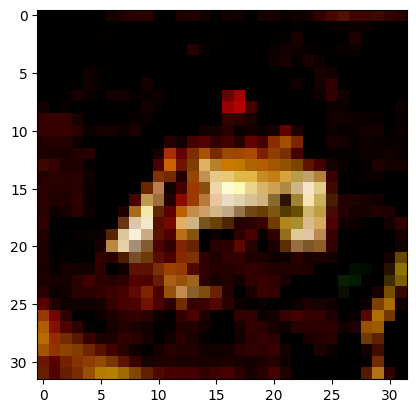

In [ ]:
print(load_real_samples().shape)

X=load_real_samples()

pyplot.imshow(X[0])

In [ ]:
def generate_real_samples(dataset, n_samples):
  ix= np.random.randint(0,dataset.shape[0], n_samples)
  X=dataset[ix]

  y= np.ones((n_samples,1))

  return X,y

In [ ]:
X,y= generate_real_samples(X,64)

In [ ]:
X.shape

(64, 32, 32, 3)

In [ ]:
y.shape

(64, 1)

In [ ]:
def generate_fake_samples(n_samples):
  X= np.random.rand(32*32*3*n_samples)
  X=-1 + 2*X
  X=X.reshape((n_samples,32,32,3))

  y=np.zeros((n_samples,1))

  return X,y

(64, 32, 32, 3) (64, 1)


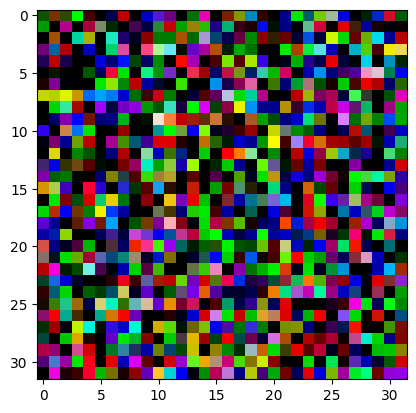

In [ ]:
X,y= generate_fake_samples(64)
print(X.shape,y.shape)
pyplot.imshow(X[0])

In [ ]:
def train_discriminator(model,dataset, n_iter=30, n_batches=128):
  half_batch= int(n_batches/2)

  for i in range(n_iter):
    X_real,y_real= generate_real_samples(dataset,half_batch)

    _,real_acc= model.train_on_batch(X_real,y_real)

    X_fake,y_fake= generate_fake_samples(half_batch)

    _, fake_acc= model.train_on_batch(X_fake,y_fake)

    print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))

In [ ]:
model= def_discriminator()
dataset= load_real_samples()

train_discriminator(model,dataset)

>1 real=97% fake=48%
>2 real=66% fake=49%
>3 real=59% fake=50%
>4 real=57% fake=53%
>5 real=57% fake=59%
>6 real=62% fake=65%
>7 real=68% fake=70%
>8 real=71% fake=73%
>9 real=74% fake=75%
>10 real=76% fake=77%
>11 real=78% fake=79%
>12 real=80% fake=81%
>13 real=81% fake=82%
>14 real=83% fake=83%
>15 real=84% fake=84%
>16 real=84% fake=85%
>17 real=85% fake=86%
>18 real=86% fake=87%
>19 real=87% fake=87%
>20 real=88% fake=88%
>21 real=88% fake=89%
>22 real=89% fake=89%
>23 real=89% fake=89%
>24 real=90% fake=90%
>25 real=90% fake=90%
>26 real=91% fake=91%
>27 real=91% fake=91%
>28 real=91% fake=91%
>29 real=92% fake=92%
>30 real=92% fake=92%


In [ ]:
def define_generator(latent_dim):
  model= Sequential()

  n_nodes = 256*4*4

  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4,4,256)))


  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))##upsampling(4x4 --->8x8--->16x16---->32x32)
  model.add(LeakyReLU(alpha=0.2))


  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same')) ## upsampling
  model.add(LeakyReLU(alpha=0.2))


  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(3,(3,3), activation= 'tanh', padding='same'))

  return model



In [ ]:
latent_dim=100

model= define_generator(latent_dim)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

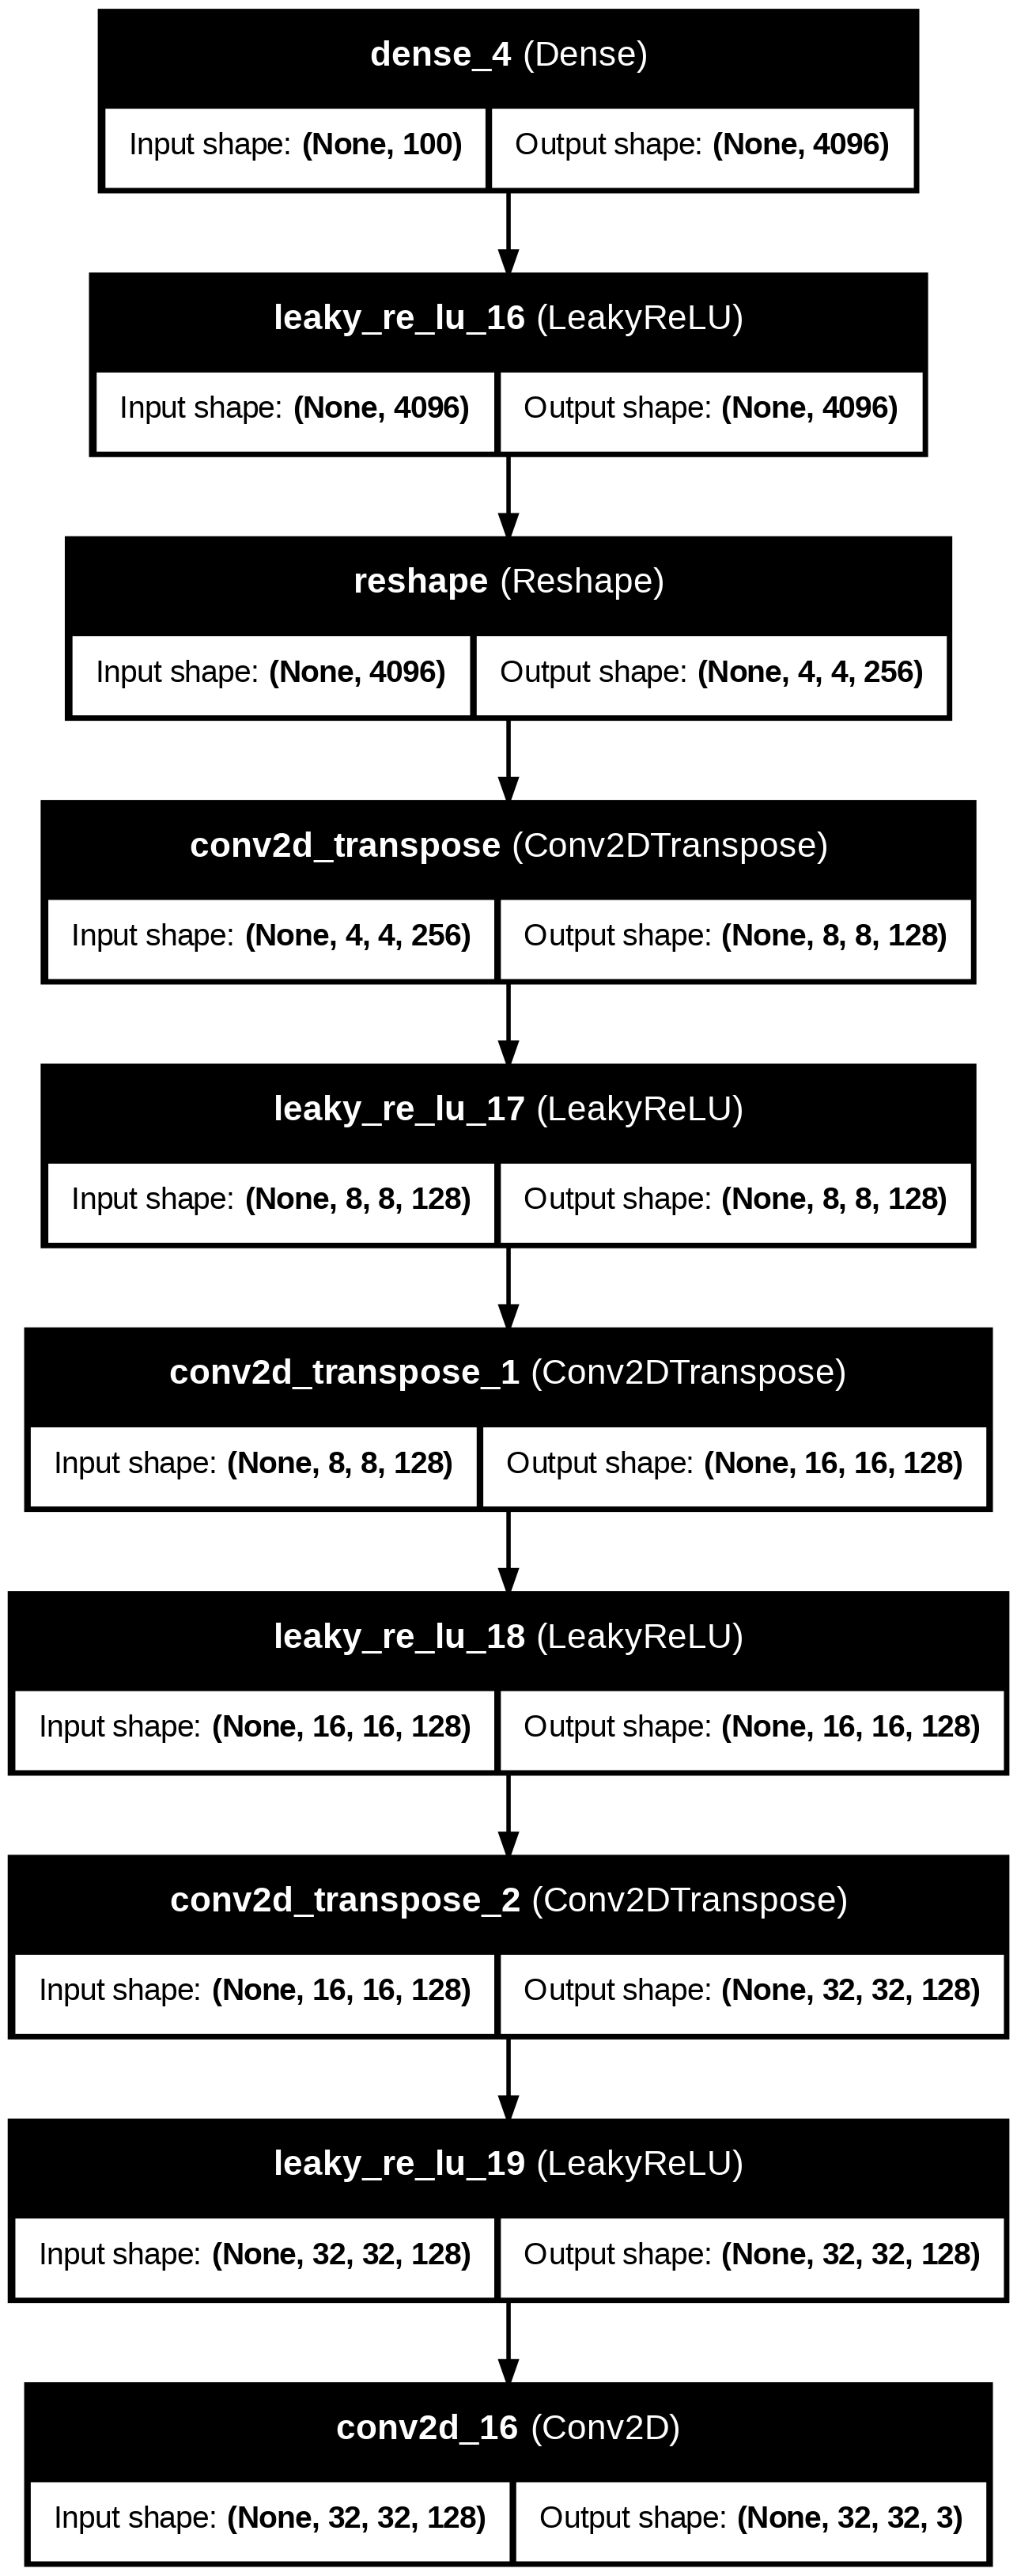

In [ ]:
plot_model(model, to_file='generator.png', show_shapes=True, show_layer_names=True)

In [ ]:
def generate_latent_points(latent_dim, n_samples):
  X_input= np.random.rand(latent_dim*n_samples)
  X_input=X_input.reshape(n_samples,latent_dim)
  return X_input

In [ ]:
X_input= generate_latent_points(100,64)
X_input.shape

(64, 100)

In [ ]:
def generate_fake_samples(g_model,latent_dim, n_samples):
  x_input= generate_latent_points(latent_dim,n_samples)
  X= g_model.predict(x_input)

  y=np.zeros((n_samples,1))

  return X,y

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step 


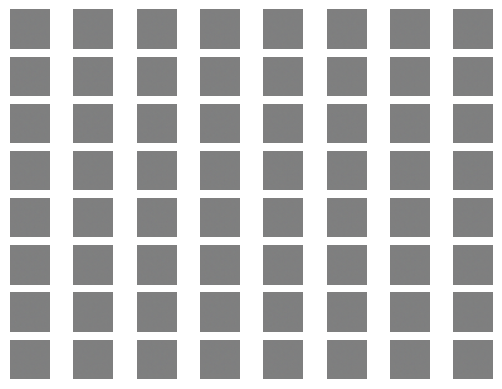

In [ ]:
latent_dim=100


model= define_generator(latent_dim)
n_samples= 64
X,_= generate_fake_samples(model,latent_dim,n_samples )

X = (X+1)/2

for i in range(n_samples):

  pyplot.subplot(8,8,1+i)
  pyplot.axis('off')
  pyplot.imshow(X[i])

pyplot.show()

In [ ]:
def Gan(g_model, d_model):
  d_model.trainable= False ## only generator's weights will be updated
  model= Sequential()
  model.add(g_model)
  model.add(d_model)

  opt= Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

In [ ]:
latent_dim =100

d_model= def_discriminator()

g_model=define_generator(latent_dim)

gan_model= Gan(g_model,d_model)

gan_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)       │ (None, 32, 32, 3)      │     1,466,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ (None, 1)              │       522,497 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988,612 (7.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 522,497 (1.99 MB)

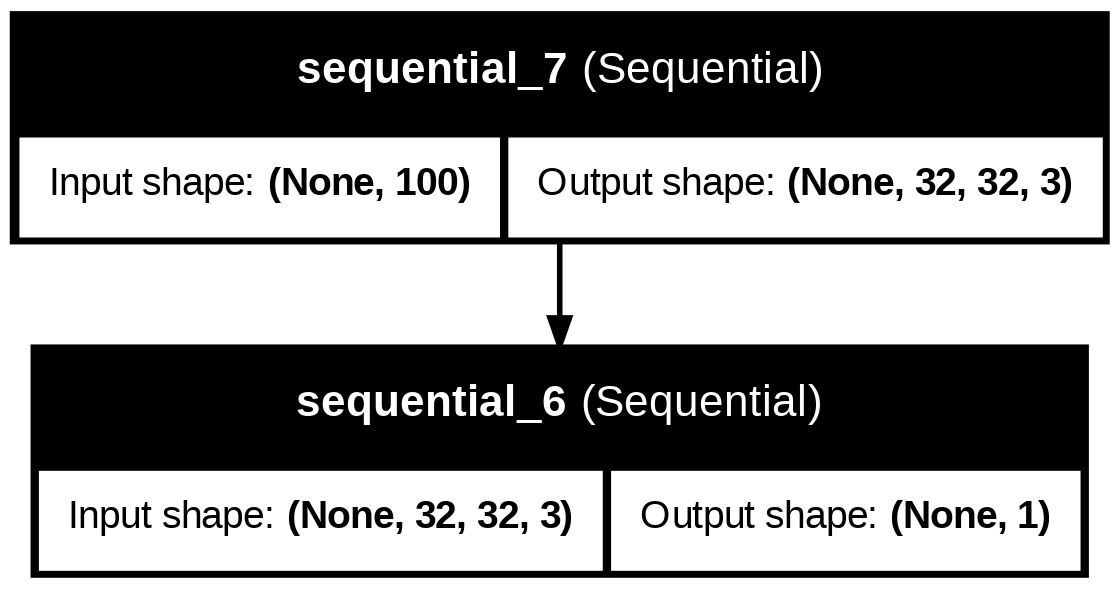

In [ ]:
plot_model(gan_model, to_file='gan.png', show_shapes=True, show_layer_names=True)

In [ ]:
def train_gan(gan_model, g_model,d_model, latent_dim, n_epochs=100, n_batch=128):
  batch_per_epoch= int(dataset.shape[0]/n_batch)

  half_batch= int(n_batch/2)


  for i in range(n_epochs):
    for j in range(batch_per_epoch):
      X_real,y_real= generate_real_samples(dataset,half_batch)

      d_loss1, _ = d_model.train_on_batch(X_real, y_real)

      X_fake,y_fake= generate_fake_samples(g_model,latent_dim,half_batch)

      d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)

      X_gan= generate_latent_points(latent_dim,n_batch)
      y_gan= np.ones((n_batch,1))

      g_loss= gan_model.train_on_batch(X_gan,y_gan)

      print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f'%(i+1,j+1,batch_per_epoch,d_loss1,d_loss2,g_loss))

    if (i+1)%10==0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)


In [ ]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
  X_real, y_real = generate_real_samples(dataset, n_samples)
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  _,acc_fake= d_model.evaluate(x_fake,y_fake, verbose=0)

  print('Accuracy real: %.0f%%, fake: %.0f%%'%(acc_real*100,acc_fake*100))

  save_plot(x_fake, epoch)

  filename= 'generator_model_%03d.h5'%(epoch+1)
  g_model.save(filename)

In [ ]:
def save_plot(examples, epoch, n=10):
  examples= (examples+1)/2.0

  for i in range(n*n):
    pyplot.subplot(n,n,i+1)
    pyplot.axis('off')
    pyplot.imshow(examples[i])

  filename= 'generated_plot_e%03d.png'%(epoch+1)
  pyplot.savefig(filename)
  pyplot.close()

In [ ]:
train_gan(gan_model, g_model,d_model, latent_dim, n_epochs=100, n_batch=128)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Streaming output truncated to the last 5000 lines.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>4, 232/390, d1=1.526, d2=1.527 g=0.105
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
>4, 233/390, d1=1.526, d2=1.527 g=0.105
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
>4, 234/390, d1=1.526, d2=1.527 g=0.105
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>4, 235/390, d1=1.526, d2=1.527 g=0.105
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>4, 236/390, d1=1.526, d2=1.527 g=0.105
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>4, 237/390, d1=1.527, d2=1.527 g=0.105
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
>4, 238/390, d1=1.527, d2=1.527 g=0.105
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
>4, 239/390, d1=1.527, d2=1.527 g=0.105
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>4, 240/390, d1=1.527, d2=1.527 g=0.105
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>4, 241/390, d1=1.527, d2=1.527 g=0.105
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>4, 242/390, d1=1.527, d2=1.527 g=0.105
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>4, 243/390, d1=1.527, d2=1.527 g=0.105
2/2 ━━━━━━━━━

Streaming output truncated to the last 5000 lines.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>14, 232/390, d1=1.611, d2=1.612 g=0.090
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>14, 233/390, d1=1.611, d2=1.612 g=0.090
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>14, 234/390, d1=1.611, d2=1.612 g=0.090
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>14, 235/390, d1=1.611, d2=1.612 g=0.090
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>14, 236/390, d1=1.611, d2=1.612 g=0.090
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>14, 237/390, d1=1.611, d2=1.612 g=0.090
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
>14, 238/390, d1=1.611, d2=1.612 g=0.090
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>14, 239/390, d1=1.611, d2=1.612 g=0.090
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>14, 240/390, d1=1.611, d2=1.612 g=0.090
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>14, 241/390, d1=1.611, d2=1.612 g=0.090
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
>14, 242/390, d1=1.611, d2=1.612 g=0.090
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
>14, 243/390, d1=1.611, d2=1.612 g=0.090
2

Streaming output truncated to the last 5000 lines.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>24, 232/390, d1=1.629, d2=1.630 g=0.086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>24, 233/390, d1=1.629, d2=1.630 g=0.086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>24, 234/390, d1=1.629, d2=1.630 g=0.086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>24, 235/390, d1=1.629, d2=1.630 g=0.086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>24, 236/390, d1=1.629, d2=1.630 g=0.086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>24, 237/390, d1=1.629, d2=1.630 g=0.086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>24, 238/390, d1=1.629, d2=1.630 g=0.086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>24, 239/390, d1=1.629, d2=1.630 g=0.086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>24, 240/390, d1=1.629, d2=1.630 g=0.086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>24, 241/390, d1=1.629, d2=1.630 g=0.086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>24, 242/390, d1=1.629, d2=1.630 g=0.086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>24, 243/390, d1=1.629, d2=1.630 g=0.086
2

Streaming output truncated to the last 5000 lines.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>34, 232/390, d1=1.635, d2=1.636 g=0.084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>34, 233/390, d1=1.635, d2=1.636 g=0.084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>34, 234/390, d1=1.635, d2=1.636 g=0.084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>34, 235/390, d1=1.635, d2=1.636 g=0.084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>34, 236/390, d1=1.635, d2=1.636 g=0.084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>34, 237/390, d1=1.635, d2=1.636 g=0.084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>34, 238/390, d1=1.635, d2=1.636 g=0.084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>34, 239/390, d1=1.635, d2=1.636 g=0.084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>34, 240/390, d1=1.635, d2=1.636 g=0.084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>34, 241/390, d1=1.635, d2=1.636 g=0.084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
>34, 242/390, d1=1.635, d2=1.636 g=0.084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>34, 243/390, d1=1.635, d2=1.636 g=0.084
2

Streaming output truncated to the last 5000 lines.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>44, 232/390, d1=1.640, d2=1.641 g=0.083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>44, 233/390, d1=1.640, d2=1.641 g=0.083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>44, 234/390, d1=1.640, d2=1.641 g=0.083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
>44, 235/390, d1=1.640, d2=1.641 g=0.083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>44, 236/390, d1=1.640, d2=1.641 g=0.083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>44, 237/390, d1=1.640, d2=1.641 g=0.083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>44, 238/390, d1=1.640, d2=1.641 g=0.083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>44, 239/390, d1=1.640, d2=1.641 g=0.083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
>44, 240/390, d1=1.640, d2=1.641 g=0.083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>44, 241/390, d1=1.640, d2=1.641 g=0.083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>44, 242/390, d1=1.640, d2=1.641 g=0.083
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>44, 243/390, d1=1.640, d2=1.641 g=0.083
2

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>51, 1/390, d1=1.850, d2=2.059 g=0.082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>51, 2/390, d1=1.758, d2=1.910 g=0.082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>51, 3/390, d1=1.723, d2=1.840 g=0.082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>51, 4/390, d1=1.705, d2=1.801 g=0.082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
>51, 5/390, d1=1.695, d2=1.772 g=0.082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
>51, 6/390, d1=1.686, d2=1.753 g=0.082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
>51, 7/390, d1=1.680, d2=1.738 g=0.082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>51, 8/390, d1=1.674, d2=1.727 g=0.082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>51, 9/390, d1=1.671, d2=1.718 g=0.082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>51, 10/390, d1=1.668, d2=1.711 g=0.082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>51, 11/390, d1=1.666, d2=1.705 g=0.082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>51, 12/390, d1=1.664, d2=1.700 g=0.082
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>51, 13/390, d1=1.662, d2=1.695 g=0